# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [32]:
from keras.datasets import cifar100

(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar100.load_data()

In [33]:
print(x_img_train.shape, y_label_train.shape, x_img_test.shape, y_label_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [25]:
label_dict = {
0:'apple',1:'aquarium_fish',2:'baby',3:'bear',4:'beaver',5:'bed',
6:'bee',7:'beetle',8:'bicycle',9:'bottle',10:'bowl',
11:'boy',12:'bridge',13:'bus',14:'butterfly',15:'camel',
16:'can',17:'castle',18:'caterpillar',19:'cattle',20:'chair',
21:'chimpanzee',22:'clock',23:'cloud',24:'cockroach',25:'couch',
26:'crab',27:'crocodile',28:'cup',29:'dinosaur',30:'dolphin',
31:'elephant',32:'flatfish',33:'forest',34:'fox',35:'girl',
36:'hamster',37:'house',38:'kangaroo',39:'computer_keyboard',40:'lamp',
41:'lawn_mower',42:'leopard',43:'lion',44:'lizard',45:'lobster',
46:'man',47:'maple_tree',48:'motorcycle',49:'mountain',50:'mouse',
51:'mushroom',52:'oak_tree',53:'orange',54:'orchid',55:'otter',
56:'palm_tree',57:'pear',58:'pickup_truck',59:'pine_tree',60:'plain',
61:'plate',62:'poppy',63:'porcupine',64:'possum',65:'rabbit',
66:'raccoon',67:'ray',68:'road',69:'rocket',70:'rose',
71:'sea',72:'seal',73:'shark',74:'shrew',75:'skunk',
76:'skyscraper',77:'snail',78:'snake',79:'spider',80:'squirrel',
81:'streetcar',82:'sunflower',83:'sweet_pepper',84:'table',85:'tank',
86:'telephone',87:'television',88:'tiger',89:'tractor',90:'train',
91:'trout',92:'tulip',93:'turtle',94:'wardrobe',95:'whale',
96:'willow_tree',97:'wolf',98:'woman',99:'worm',
}

In [41]:
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=100):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>100: num=100
    for i in range(0, num):
        ax=plt.subplot(10,10, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+' , '+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=> '+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

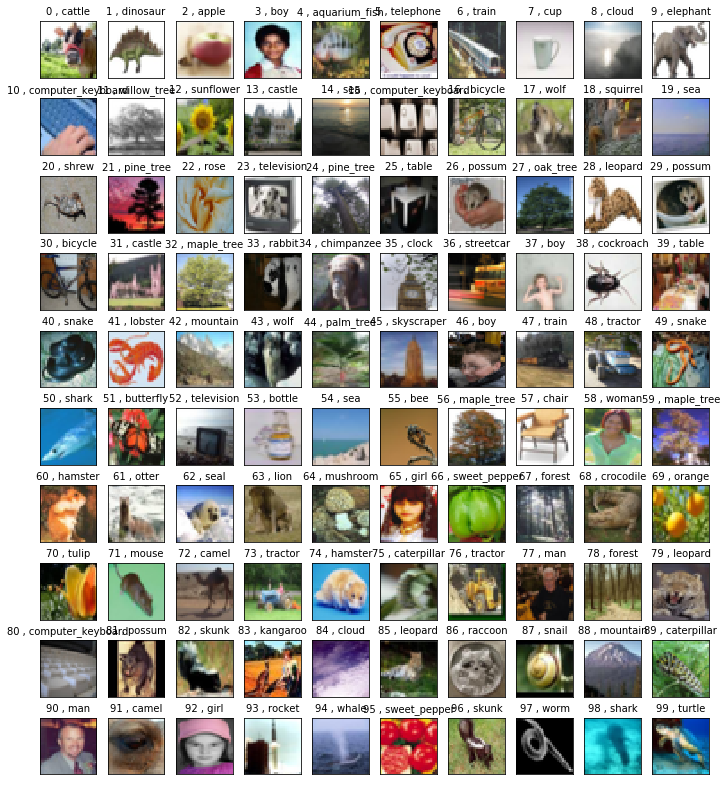

In [42]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [43]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [44]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [45]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [47]:
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=100):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+' , '+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=> '+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

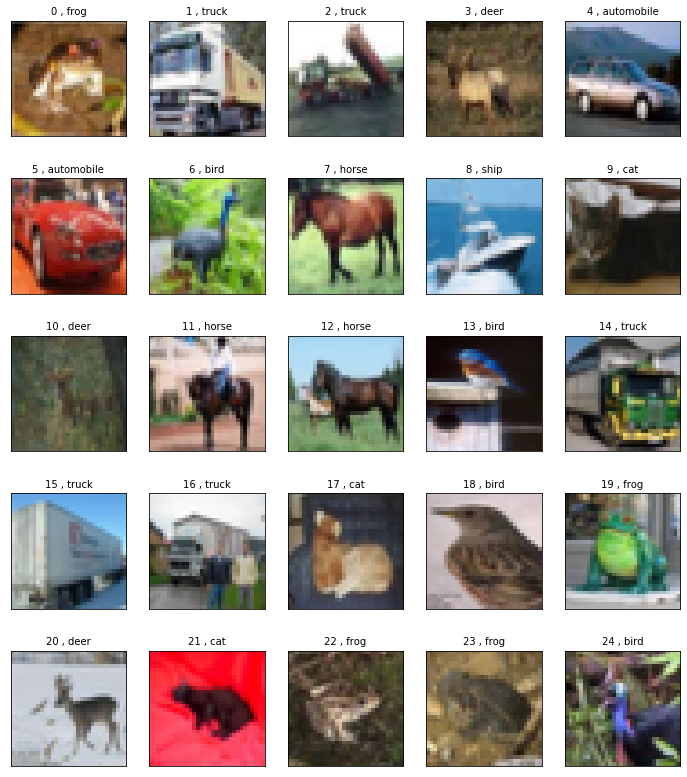

In [48]:
plot_images_labels_prediction(x_train,y_train,[],0)

# Image normalize 

In [55]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [56]:
x_train_normalize = x_train.astype('float32') / 255.0
x_test_normalize = x_test.astype('float32') / 255.0

In [57]:
print(x_img_train[0][0][0], x_img_train_normalize[0][0][0])

[255 255 255] [1. 1. 1.]


In [58]:
print(x_train[0][0][0], x_train_normalize[0][0][0])

[59 62 63] [0.23137255 0.24313726 0.24705882]


# 轉換label 為OneHot Encoding

In [59]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_train_OneHot = np_utils.to_categorical(y_train)
y_test_OneHot = np_utils.to_categorical(y_test)

In [60]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [61]:
y_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)